![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Customer Analysis Round 3
##### Isidre Munné-Bertran

For this lab, we still keep using the `marketing_customer_analysis.csv` file. You can find the file in the `files_for_lab` folder.

### Get the data

- Use the same jupyter file from the last lab, `Customer Analysis Round 3`

### EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:

1. Show DataFrame info.
2. Describe DataFrame.
3. Show a plot of the total number of responses.
4. Show a plot of the response rate by the sales channel.
5. Show a plot of the response rate by the total claim amount.
6. Show a plot of the response rate by income.

In [23]:
# Library keepers
import pandas as pd
import numpy as np

# New ones for this LAB
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
pd.set_option('display.max_columns', None) # displays all columns in dfs
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # no more warnings. HURRAY !!!!

In [24]:
df = pd.read_csv('marketing_customer_analysis.csv')

### 1. Show DataFrame info.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In this dataset we have `9134` entries in `24` columns.

In [26]:
df.sample(5) # Let's get information from 5 random rows

Customer       State  Customer Lifetime Value Response Coverage  \
3937  KL29678      Oregon              8624.917663       No    Basic   
397   ON73702     Arizona              9080.639651       No    Basic   
8617  EY71439  California              7131.731291       No    Basic   
4851  YF30946  California              2405.618791       No    Basic   
5412  II49996     Arizona              5555.830205      Yes    Basic   

                 Education Effective To Date EmploymentStatus Gender  Income  \
3937                Master            1/8/11         Employed      F   43610   
397               Bachelor           1/26/11         Employed      F   33897   
8617  High School or Below           1/10/11       Unemployed      M       0   
4851               College           2/19/11         Employed      M   63032   
5412              Bachelor            2/6/11         Employed      M   74015   

     Location Code Marital Status  Monthly Premium Auto  \
3937      Suburban        Married                   106   
397          Urban        Married                   114   
8617      Suburban         Single                   103   
4851      Suburban        Married                    61   
5412      Suburban         Single                    72   

      Months Since Last Claim  Months Since Policy Inception  \
3937                       16                             60   
397                        15                             67   
8617                       29                             58   
4851                        5                             79   
5412                       12                             61   

      Number of Open Complaints  Number of Policies     Policy Type  \
3937                          0                   5   Personal Auto   
397                           0                   8  Corporate Auto   
8617                          0                   3  Corporate Auto   
4851                          0                   1   Personal Auto   
5412                          0                   6   Personal Auto   

            Policy Renew Offer Type Sales Channel  Total Claim Amount  \
3937   Personal L3           Offer2         Agent          508.800000   
397   Corporate L3           Offer1         Agent          539.843003   
8617  Corporate L2           Offer3   Call Center          741.600000   
4851   Personal L3           Offer2         Agent          404.550554   
5412   Personal L1           Offer2   Call Center          471.443077   

      Vehicle Class Vehicle Size  
3937     Sports Car      Medsize  
397             SUV        Small  
8617     Sports Car        Small  
4851  Four-Door Car      Medsize  
5412  Four-Door Car        Small

### 2. Describe DataFrame.

In [27]:
df.describe()

Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678

### EXTRA:  Cleaning the datasetcolumns (standarize the names)
As a good practice.

In [28]:
df.columns = cc = [column.lower().replace(' ', '_') for column in df]

### 3. Show a plot of the total number of responses.

<AxesSubplot:>

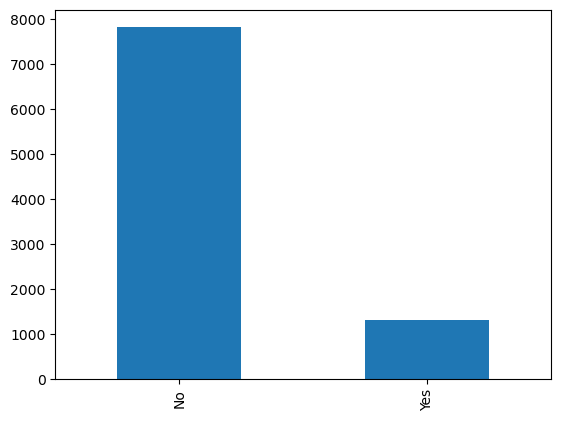

In [30]:
df['response'].value_counts().plot(kind='bar') #Thanks to Cormac, I did not know what kind='bar' was

### 4. Show a plot of the response rate by the sales channel.

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

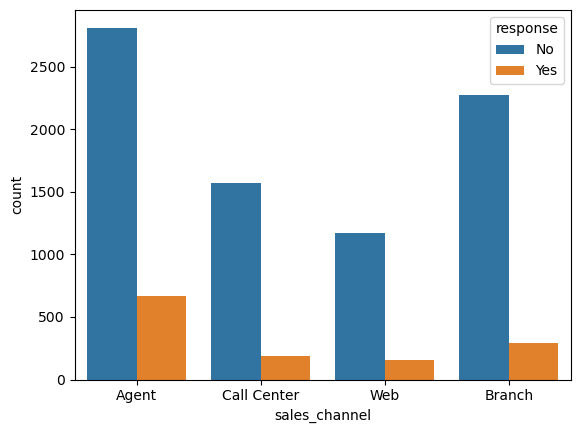

In [31]:
sns.countplot('sales_channel', hue='response', data=df)

### 5. Show a plot of the response rate by the total claim amount.

<AxesSubplot:xlabel='total_claim_amount', ylabel='response'>

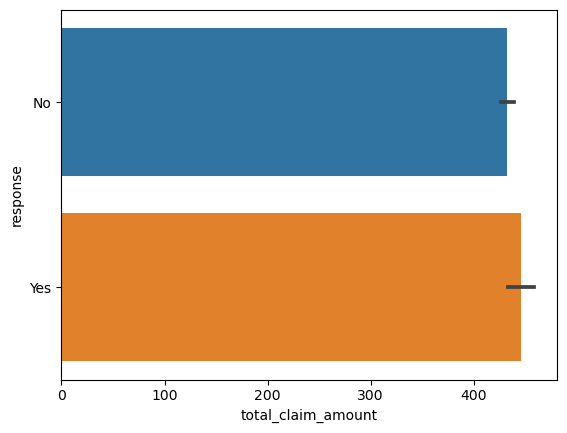

In [32]:
sns.barplot(x='total_claim_amount', y='response', data = df)

### 6. Show a plot of the response rate by income.

<AxesSubplot:xlabel='response', ylabel='income'>

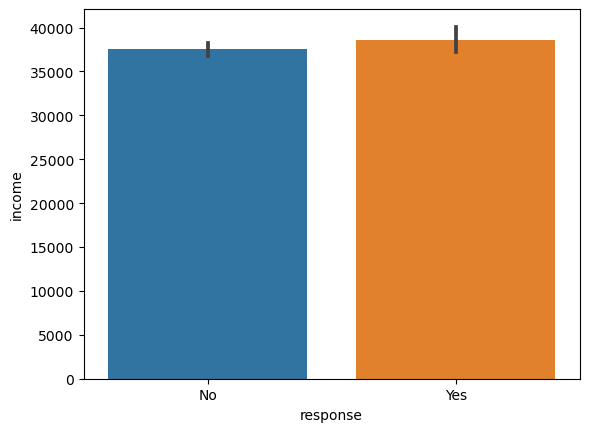

In [33]:
sns.barplot(x='response', y='income', data = df)